In [12]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
conn = psycopg2.connect(
    host="localhost",
    database="gpx",
    user="root",
    password="root"
)

In [10]:
query = """
WITH ordered_route_points AS (
    SELECT location
    FROM gpx_route
    ORDER BY id
),
route_linestring AS (
    SELECT ST_MakeLine(ST_Transform(location, 3857)) AS route
    FROM ordered_route_points
)

SELECT
    time,
    ST_Y(location) AS latitude,
    ST_X(location) AS longitude,
    ST_Distance(ST_Transform(location, 3857), (SELECT route FROM route_linestring)) AS distance_to_route
FROM
    garmin_route;
"""

with conn.cursor() as cur:
    cur.execute(query)
    rows = cur.fetchall()

garmin_df = pd.DataFrame(rows, columns=["time", "latitude", "longitude", "distance_to_route"])

garmin_df.head(10)

,time,latitude,longitude,distance_to_route
0,2024-05-26 22:18:49+00:00,1.309699,103.896454,231.391652
1,2024-05-26 22:18:56+00:00,1.309665,103.896435,228.948959
2,2024-05-26 22:18:57+00:00,1.309670,103.896451,230.757277
3,2024-05-26 22:19:03+00:00,1.309684,103.896497,235.966028
4,2024-05-26 22:19:06+00:00,1.309688,103.896490,235.321526
5,2024-05-26 22:19:08+00:00,1.309692,103.896489,235.186966
6,2024-05-26 22:19:13+00:00,1.309660,103.896477,233.503920
7,2024-05-26 22:19:20+00:00,1.309565,103.896476,232.547087
8,2024-05-26 22:19:22+00:00,1.309537,103.896467,231.434889
9,2024-05-26 22:19:31+00:00,1.309397,103.896403,224.117865


In [9]:
query = """
WITH ordered_route_points AS (
    SELECT location
    FROM gpx_route
    ORDER BY id
),
route_linestring AS (
    SELECT ST_MakeLine(ST_Transform(location, 3857)) AS route
    FROM ordered_route_points
)

SELECT
    time,
    ST_Y(location) AS latitude,
    ST_X(location) AS longitude,
    ST_Distance(ST_Transform(location, 3857), (SELECT route FROM route_linestring)) AS distance_to_route
FROM
    polar_route;
"""

with conn.cursor() as cur:
    cur.execute(query)
    rows = cur.fetchall()

polar_df = pd.DataFrame(rows, columns=["time", "latitude", "longitude", "distance_to_route"])

polar_df.head(10)

,time,latitude,longitude,distance_to_route
0,2024-05-26 22:19:27.641000+00:00,1.309362,103.896368,220.451582
1,2024-05-26 22:19:28.642000+00:00,1.309355,103.896353,218.818110
2,2024-05-26 22:19:29.642000+00:00,1.309360,103.896333,216.567873
3,2024-05-26 22:19:30.642000+00:00,1.309362,103.896312,214.150684
4,2024-05-26 22:19:31.641000+00:00,1.309360,103.896298,212.675941
5,2024-05-26 22:19:32.641000+00:00,1.309357,103.896297,212.509166
6,2024-05-26 22:19:33.641000+00:00,1.309353,103.896302,213.083562
7,2024-05-26 22:19:34.641000+00:00,1.309353,103.896300,212.897896
8,2024-05-26 22:19:35.641000+00:00,1.309353,103.896292,211.971796
9,2024-05-26 22:19:36.641000+00:00,1.309352,103.896278,210.498256


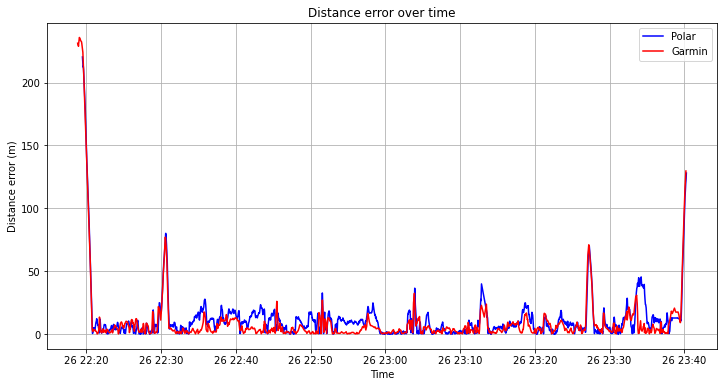

In [14]:
plt.figure(figsize=(12, 6))
plt.plot(polar_df['time'], polar_df['distance_to_route'], color='blue', label='Polar')
plt.plot(garmin_df['time'], garmin_df['distance_to_route'], color='red', label='Garmin')
plt.xlabel('Time')
plt.ylabel('Distance error (m)')
plt.title('Distance error over time')
plt.legend()
plt.grid(True)
plt.show()